<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" alt="alt text" width="350" height="100">


<h3>Pytorch nn.Module</h3>
In Pytorch the basic template for creating models is the "Module" class within torch.nn. To create a class, this class is inherited as the "superclass" so that all the properties and functions can be accessed. <br>

In [45]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

The two main functions need to be created are the <b>\__init__</b> and <b>forward</b> functions.

The <b>forward</b> function is the only function before building class, Pytorch uses this fuction as the "entry point" to the model and is called when doing a forward pass of the model.


In [46]:
# Creating the class inheriting from the nn.Module class
class SimpleFunction(nn.Module):
    """
    Simple implementation of an nn.Module subclass
    Takes the input (x) and returns x * 4 + 2
    """
    def __init__(self):
        # Pass the class and self to superclass and call the superclass's init function
        super(SimpleFunction, self).__init__()

    def forward(self, x):
        return x * 4 + 2

In [47]:
# Create an instance of the class
simple_function = SimpleFunction()

# Perform a "forward pass" of the class
output = simple_function(10)
print("Class output:", output)

# Do NOT need to explicitly call the .forward() function of the class,
# A forward pass of the models is a common step that Pytorch makes it easier and clearer to do

Class output: 42


<h3>A more complicated model </h3>
The previous nn.Module class that created wasn't really a ML "model". A simple linear model will be created in this section.

In [48]:
class LinearModel(nn.Module):
    """
    Takes the input (x) and returns x * w^t + b
    """
    def __init__(self, input_size, output_size):
        # Pass the class and self to superclass and call the superclass's init function
        super(LinearModel, self).__init__()

        # nn.Parameter wraps the normal tensors and "tells" Pytorch
        # That they are the nn.Module's model parameters to be optimized
        # nn.Parameter has the requires grad flag set to True by default
        self.w = nn.Parameter(torch.randn(output_size, input_size))
        self.b = nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        return torch.matmul(x,  self.w.t()) + self.b

In [49]:
#Create a batch of 10 datapoints each 5D
input_data = torch.randn(10, 5)

#Create an instance of the Model
linear_model = LinearModel(5, 1)

#Perform a forward pass
output = linear_model(input_data)

print(output.shape)
print(output.flatten().detach())
#Note: detach "disconnects" the tensor and returns it with no history of previous calculations

torch.Size([10, 1])
tensor([ 2.3415,  3.2251,  1.1223,  3.4108,  3.2142,  1.9206,  3.1369, -3.9104,
         1.6117,  3.6997])


<h3>Pytorch inbuilt Neural Network Layers</h3>
This "Linear layer" is so common that Pytorch already has an implementation of it, in fact Pytorch has implementations of most Layer types which act as building blocks for the multi-layer models.<br>
- Pytorch initialises the weights and biases of it's layers in particular ways (not just from a normal distribution), usualy based off of deep learning research.<br>
- Pytorch includes a bias term in it's layers by default.

In [50]:
# Build a linear layer or a "Perceptron" layer
# nn.Linear(Number of inputs, Number of outputs)
linear = nn.Linear(3, 1)

# The "weights" are what is multipied by the input data
print ('w:\n', linear.weight.data)

# The bias is then added on
print ('b:\n', linear.bias.data)

print ('w shape:\n', linear.weight.data.shape)
print ('b shape:\n', linear.bias.data.shape)

# Note: .data just gives the raw Tensor without any connection to the computational graph

# Note: The opperation the linear layer performs is y = x*A^t + b
# Where A^t is the transpose of the weights and b is the bias,
# This opperation is also know as an "affine transformation"

w:
 tensor([[ 0.0386, -0.1755,  0.3168]])
b:
 tensor([0.2286])
w shape:
 torch.Size([1, 3])
b shape:
 torch.Size([1])


In [51]:
# Take a look at the gradients of these parameters
print ('w:\n', linear.weight.grad)
print ('b:\n', linear.bias.grad)

# Note: Pytorch initialises the grad of the tensors to "None" NOT 0
# They only get created after the first backwards pass.

w:
 None
b:
 None


In [52]:
# Create a random data input tensor
data = torch.randn(100, 3)
# Create some noisey target data
target = data.sum(1, keepdims=True) + 0.01 * torch.randn(data.shape[0], 1)

print ('Input data:\n', data[:10])
print ('Output data:\n', target[:10])

Input data:
 tensor([[-0.9944, -0.5955, -0.8709],
        [-1.3892,  1.0370,  1.7785],
        [-0.1673,  1.6457,  1.2342],
        [-1.5424,  1.5813, -0.0185],
        [ 1.4410, -0.6249,  0.0460],
        [-0.0661,  0.1654, -0.5206],
        [ 0.6002, -0.0683, -0.2919],
        [ 0.5713, -0.6619, -0.1637],
        [ 0.2272, -1.8014, -0.7538],
        [-0.5341, -0.4973, -1.6371]])
Output data:
 tensor([[-2.4479],
        [ 1.4232],
        [ 2.7016],
        [ 0.0155],
        [ 0.8676],
        [-0.4217],
        [ 0.2415],
        [-0.2596],
        [-2.3420],
        [-2.6700]])


Put the data into the model and see what comes out

In [53]:
# To perform a forward pass of the model, "call" the network is required
# Pytorch's nn.Module class will automatically pass it to the "forward" function in the layer class
target_pred = linear(data)

print("Network output:\n", target_pred.data[:10])
print("Network output shape:", target_pred.shape)

Network output:
 tensor([[ 0.0188],
        [ 0.5564],
        [ 0.3243],
        [-0.1144],
        [ 0.4085],
        [ 0.0321],
        [ 0.1713],
        [ 0.3150],
        [ 0.3147],
        [-0.2234]])
Network output shape: torch.Size([100, 1])


<h3>Loss Functions and Optimizers</h3>

<b>Loss functions</b><br>
Using Pytorch can pick from pre-defined functions - Pytorch has many Loss function already created and optimized.

<b>Optimizers</b><br>
Pytorch has a number of different optimizers, but for now the Gradient Descent (GD) optimizer will be adopted.<br>
Note: Most optimizers are just some variant of GD

In [54]:
# Lets perform a regression with a mean square error loss
loss_function = nn.MSELoss()

# Create a stochastic gradient descent optimizer with a learning rate of 0.01
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

From the following scatter plot, it can be seen that the output of the model is not the same as the target data.

Text(0, 0.5, 'y')

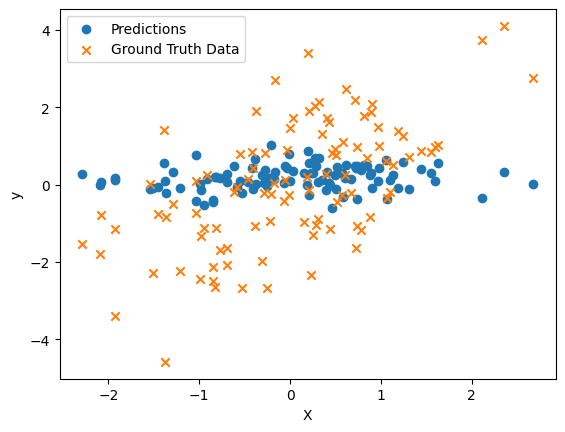

In [55]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach())

# Use the Ground Truth data
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth Data"])
plt.xlabel("X")
plt.ylabel("y")

In [56]:
loss = loss_function(target_pred, target)
print('loss:', loss.item())

loss: 2.45497727394104


In [57]:
# Conduct a backward pass
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

# Note for every backwards pass of the model, a forward pass must be performed first
# as data from parts of the computational graph have been deleted upon the backward pass to save memory.
# Pytorch can hold onto this data, but, in many cases it needs to be recalculated anyway

dL/dw:  tensor([[-1.8201, -1.9948, -1.0952]])
dL/db:  tensor([0.3243])


Finally, tell the optimizer to perform an update step

In [58]:
# The critical step to update the parameter which reduce the loss
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  2.3697705268859863


<h3>The Training Loop</h3>
For most tasks, a single training iteration in Pytorch can be summarised in the following 5 steps:<br>
- Forward pass of the model with the data.<br>
- Calculate the loss.<br>
- Reset the current stored gradients to 0<br>
- Backpropagate the loss to calculate the new gradients.<br>
- Perform an optimization step.<br>
<br>
Perform these steps over and over until the model has converged or some other point has been reached (depending on the application)

In [59]:
# Create an empty array to log the loss
loss_logger = []

# Perform 1000 itterations of the dataset
for i in range(1000):
    # Perform a forward pass of the data
    target_pred = linear(data)

    # Calculate the loss
    loss = loss_function(target_pred, target)

    # .zero_grad sets the stored gradients to 0
    optimizer.zero_grad()

    # Calculate the new gradients
    loss.backward()

    # Perform an optimization step
    optimizer.step()

    loss_logger.append(loss.item())

print("loss:", loss.item())

loss: 9.176800813293085e-05


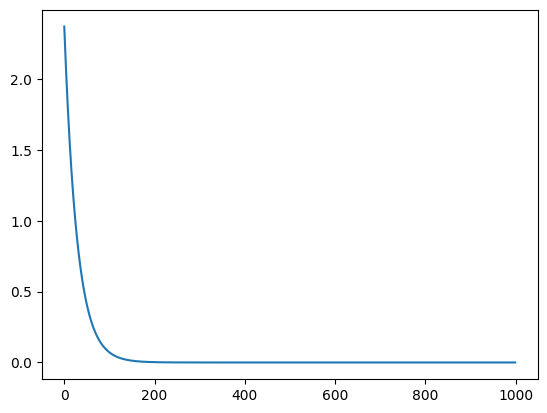

In [60]:
# Plot the decrease of the loss value
plt.plot(loss_logger)

Text(0, 0.5, 'Ouputs')

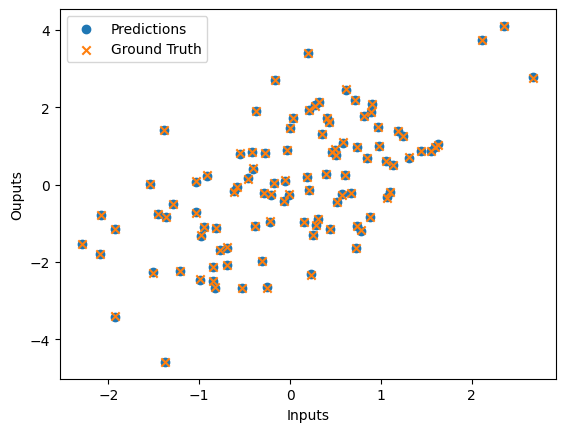

In [61]:
#Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach())
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")